In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")

if not os.path.isfile(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv"):
    df.to_csv(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv", header="column_names")
else:
    df.to_csv(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv", mode="a", header=False)
    

In [2]:
def api_runner():
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pandas as pd
    
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data["data"])
    df2["timestamp"] = pd.to_datetime("now")

    if not os.path.isfile(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv"):
        df2.to_csv(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv", header="column_names")
    else:
        df2.to_csv(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv", mode="a", header=False)

In [3]:
import os
import time

for i in range(333):
    api_runner()
    print("API run completed")
    time.sleep(3)
exit()

API run completed
API run completed
API run completed
API run completed


KeyboardInterrupt: 

In [15]:
df=pd.read_csv(r"C:\Users\shivam\Desktop\Master\Python\Crypto\Coinmarket_api_results.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
pd.set_option("Display.float_format", lambda x: "%.5f" % x)

In [ ]:
df

In [19]:
df3= df.groupby("name", sort=False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()

In [ ]:
df3

In [21]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.15829
             quote.USD.percent_change_24h     4.32826
             quote.USD.percent_change_7d     10.85345
             quote.USD.percent_change_30d    -5.04439
             quote.USD.percent_change_60d    -5.20791
             quote.USD.percent_change_90d    -0.97163
Ethereum     quote.USD.percent_change_1h      0.10948
             quote.USD.percent_change_24h     4.62171
             quote.USD.percent_change_7d     12.27230
             quote.USD.percent_change_30d    -4.93078
             quote.USD.percent_change_60d    11.34448
             quote.USD.percent_change_90d     8.41980
Tether USDt  quote.USD.percent_change_1h     -0.00860
             quote.USD.percent_change_24h    -0.00184
             quote.USD.percent_change_7d      0.03686
             quote.USD.percent_change_30d     0.11225
             quote.USD.percent_change_60d     0.04340
             quote.USD.percent_change_90

In [23]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name="values")

In [ ]:
df5

In [27]:
index = pd.Index(range(df5.shape[0]))
index


RangeIndex(start=0, stop=90, step=1)

In [29]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15829
1,Bitcoin,quote.USD.percent_change_24h,4.32826
2,Bitcoin,quote.USD.percent_change_7d,10.85345
3,Bitcoin,quote.USD.percent_change_30d,-5.04439
4,Bitcoin,quote.USD.percent_change_60d,-5.20791
5,Bitcoin,quote.USD.percent_change_90d,-0.97163
6,Ethereum,quote.USD.percent_change_1h,0.10948
7,Ethereum,quote.USD.percent_change_24h,4.62171
8,Ethereum,quote.USD.percent_change_7d,12.27230
9,Ethereum,quote.USD.percent_change_30d,-4.93078


In [31]:
df6.rename(columns={"level_1":"percentage change"},inplace=True)

In [33]:
df6

,name,percentage change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15829
1,Bitcoin,quote.USD.percent_change_24h,4.32826
2,Bitcoin,quote.USD.percent_change_7d,10.85345
3,Bitcoin,quote.USD.percent_change_30d,-5.04439
4,Bitcoin,quote.USD.percent_change_60d,-5.20791
5,Bitcoin,quote.USD.percent_change_90d,-0.97163
6,Ethereum,quote.USD.percent_change_1h,0.10948
7,Ethereum,quote.USD.percent_change_24h,4.62171
8,Ethereum,quote.USD.percent_change_7d,12.27230
9,Ethereum,quote.USD.percent_change_30d,-4.93078


In [35]:
df6["percentage change"]=df6["percentage change"].replace(["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],["1h","24h","7d","30d","60d","90d"])

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

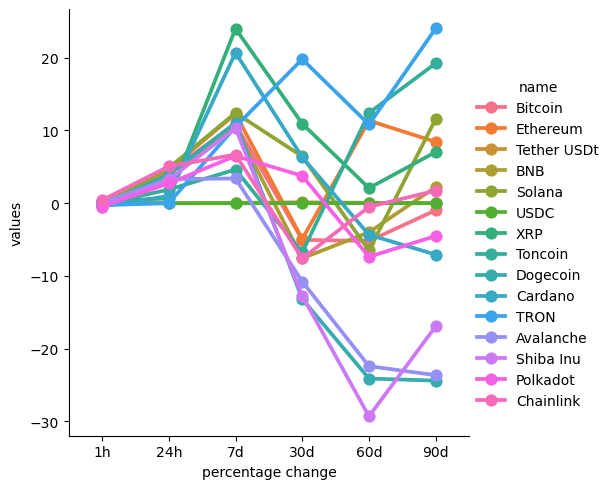

In [39]:
sns.catplot(x="percentage change",y ="values",data=df6, kind="point",hue="name")

In [41]:
df9 = df[["name","quote.USD.price","timestamp"]]
df10=df9.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62886.80983,2024-07-15 13:32:46.736269
15,Bitcoin,62886.80983,2024-07-15 13:32:47.039103
30,Bitcoin,62886.80983,2024-07-15 13:32:50.534042
45,Bitcoin,62886.80983,2024-07-15 13:32:54.244526
60,Bitcoin,62886.80983,2024-07-15 13:32:57.945270
75,Bitcoin,62675.59952,2024-07-15 15:33:06.601471
90,Bitcoin,62675.59952,2024-07-15 15:33:06.919160
105,Bitcoin,62675.59952,2024-07-15 15:33:10.704640
120,Bitcoin,62675.59952,2024-07-15 15:33:14.397444
135,Bitcoin,62675.59952,2024-07-15 15:33:18.085254


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

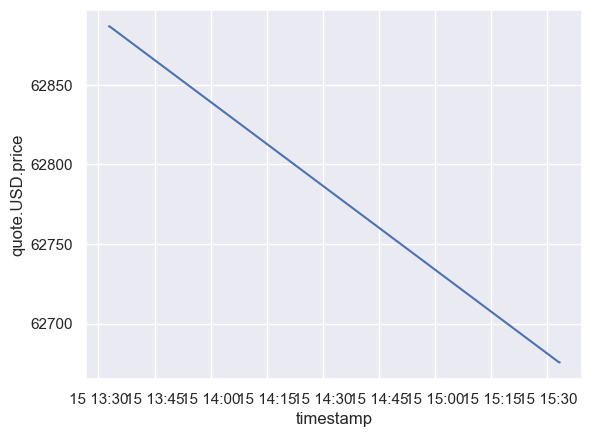

In [55]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="timestamp", y="quote.USD.price", data=df10)

In [45]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 135
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10 non-null     object 
 1   quote.USD.price  10 non-null     float64
 2   timestamp        10 non-null     object 
dtypes: float64(1), object(2)
memory usage: 320.0+ bytes


In [47]:
df10["timestamp"]= pd.to_datetime(df10["timestamp"])

C:\Users\shivam\AppData\Local\Temp\ipykernel_11800\2574993792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10["timestamp"]= pd.to_datetime(df10["timestamp"])


In [49]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62886.80983,2024-07-15 13:32:46.736269
15,Bitcoin,62886.80983,2024-07-15 13:32:47.039103
30,Bitcoin,62886.80983,2024-07-15 13:32:50.534042
45,Bitcoin,62886.80983,2024-07-15 13:32:54.244526
60,Bitcoin,62886.80983,2024-07-15 13:32:57.945270
75,Bitcoin,62675.59952,2024-07-15 15:33:06.601471
90,Bitcoin,62675.59952,2024-07-15 15:33:06.919160
105,Bitcoin,62675.59952,2024-07-15 15:33:10.704640
120,Bitcoin,62675.59952,2024-07-15 15:33:14.397444
135,Bitcoin,62675.59952,2024-07-15 15:33:18.085254
